### 1. Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- Regresión polinómica no lineal con grados del 2 al 10. ¿El score se estanca a partir de cierto grado?
- SVR

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/USA_Housing.csv")
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\r\nLaurabury, NE 37...  
1  188 Johnson Views Suite 079\r\nLake Kathleen, ...  
2  9127 Elizabeth Stravenue\r\nDanieltown, WI 064...  
3                        USS Barnett\r\nFPO AP 44820  
4                       USNS Raymond\r\nFPO AE 09386

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score


################
polynominal linear regression with degree = 7


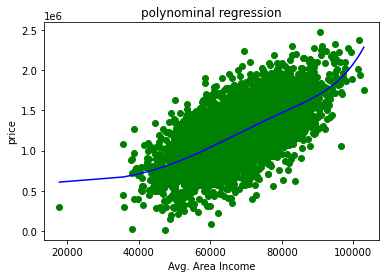

MAE: 213858.3171458952
Score of polynominal regression of Avg. Area Income, with degree 7: 0.4258778335867016


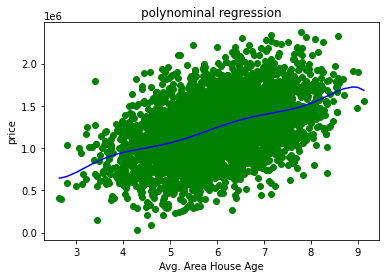

MAE: 244204.29406786777
Score of polynominal regression of Avg. Area House Age, with degree 7: 0.23928143134580215


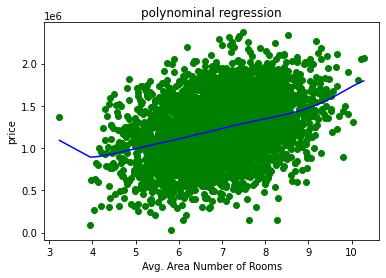

MAE: 266455.36903789884
Score of polynominal regression of Avg. Area Number of Rooms, with degree 7: 0.08632905686601067


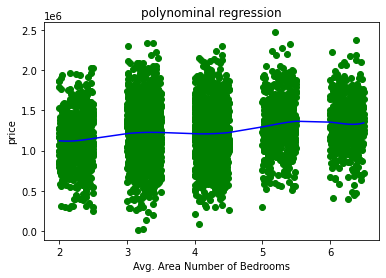

MAE: 276413.83966668096
Score of polynominal regression of Avg. Area Number of Bedrooms, with degree 7: 0.0315930604425525


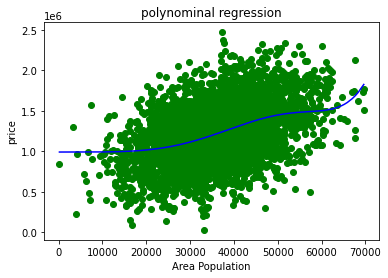

MAE: 249599.81010823668
Score of polynominal regression of Area Population, with degree 7: 0.14099524887799753
################
polynominal linear regression with degree = 8


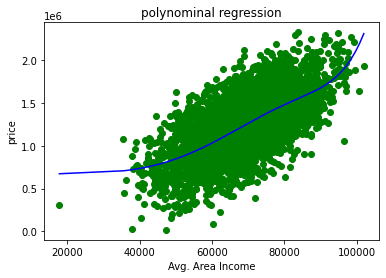

MAE: 223480.85091444777
Score of polynominal regression of Avg. Area Income, with degree 8: 0.3684391702977142


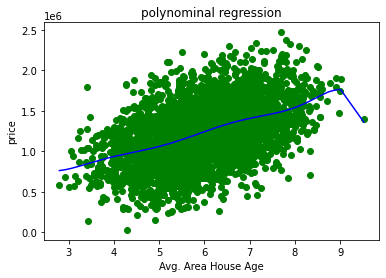

MAE: 248787.45695000398
Score of polynominal regression of Avg. Area House Age, with degree 8: 0.20108261073453404


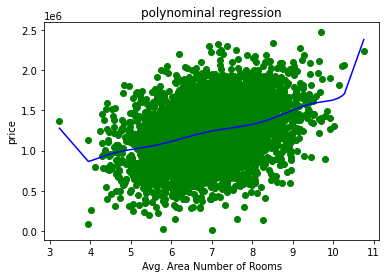

MAE: 256251.2407092608
Score of polynominal regression of Avg. Area Number of Rooms, with degree 8: 0.13574782733020185


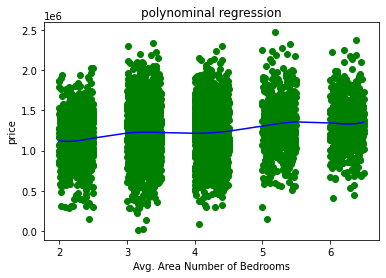

MAE: 272738.49453702074
Score of polynominal regression of Avg. Area Number of Bedrooms, with degree 8: 0.030439991443773295


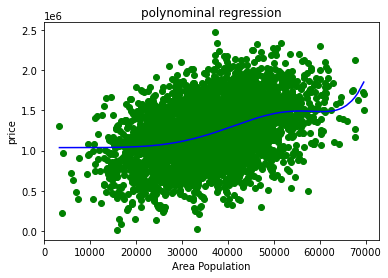

MAE: 249285.34451521985
Score of polynominal regression of Area Population, with degree 8: 0.17609193888247465


In [21]:
# polynominal linear regression with degree = 7 and 8. For the exercise put 2 and 10, but kernel freezes/gets stuck with that many inputs. 
degree_min = 7
degree_max = 8

for degree in range(degree_min,degree_max+1):
    print("################")
    print("polynominal linear regression with degree =", degree)

    for elem in df._get_numeric_data().columns:
        if elem != "Price":

            X = df[[elem]].values
            y = df.Price
            X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

            polinominal_model = PolynomialFeatures(degree) 
            X_poly = polinominal_model.fit_transform(X_train, y_train)

            lin_reg_model = LinearRegression()
            lin_reg_model.fit(X_poly, y_train)

            y_pred = lin_reg_model.predict(X_poly)

            X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
            plt.scatter(X_train_to_show, y_train_to_show, color="green")
            X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
            plt.plot(X_train_to_show, y_pred, color="blue")


            plt.title("polynominal regression")
            plt.ylabel("price")
            plt.xlabel(elem)
            plt.show()

            #score
            X_test_poly = polinominal_model.fit_transform(X_test, y_test)
            y_test_pred = lin_reg_model.predict(X_test_poly)
            score = lin_reg_model.score(X_test_poly, y_test)
            print("MAE:", mean_absolute_error(y_test, y_test_pred))
            print("Score of polynominal regression of {}, with degree {}:".format(elem, degree), score)
            



In [ ]:
#SVR

### 2. Se pide:

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendras una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ...  

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

6. Utilizar todas las columnas a la vez para clasificar "Avg. Area Number of Bedrooms", ¿hace aumentar el score? ¿por qué?